<a href="https://colab.research.google.com/github/jaygo-kr/brunch/blob/master/01_02_music_chart_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음악차트 데이터 분석 및 시각화


기존에 추출한 네이버뮤직 - 시대별 음악 차트 활용 

[네이버 뮤직 - 시대별 음악 크롤링하기](https://github.com/jaygo-kr/brunch/blob/master/01_01_get_naver_best_music.ipynb)


In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import files, drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
! apt-get install fonts-nanum* # 한글 출력을 위한 글꼴 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [3]:
os.listdir('./gdrive/My Drive/Colab/data/') # 01_01 get_naver_best_music.ipynb 로 생성한 음악차트 위치 확인

['full_data_sep.csv',
 'full_data_era.csv',
 'full_data_genre.csv',
 'full_data_all.csv',
 'merged_data.csv']

In [0]:
music_data = pd.read_csv('./gdrive/My Drive/Colab/data/merged_data.csv')

In [5]:
music_data.head()

,곡명,아티스트,앨범,시대,장르,순위/시대/장르,순위/장르,순위/시대,순위/전체
0,가로수 그늘아래 서면,이문세,5집 가로수 그늘아래서면,1980,발라드,1,157,1,291
1,사랑하기 때문에,유재하,1집 사랑하기 때문에,1980,발라드,2,161,2,305
2,너에게로 또 다시,변진섭,2집 너에게로 또다시,1980,발라드,3,288,3,555
3,가리워진 길,유재하,1집 사랑하기 때문에,1980,발라드,4,333,4,649
4,비처럼 음악처럼,김현식,3집 비처럼 음악처럼,1980,발라드,5,358,5,691


In [6]:
music_data.shape

(17575, 9)

In [0]:
# 루프에 활용할 변수 설정
ERA = music_data['시대'].unique()
GENRE = music_data['장르'].unique()

## 1. 아티스트 다양성



*   차트에 존재하는 아티스트의 수



In [8]:
len(music_data['아티스트'].unique())

2339

* 시대별 아티스트의 다양성

In [0]:
era_static = pd.DataFrame(columns=['ERA','music_num','artist_num'])
for era in ERA:
  music_num = len(music_data[music_data['시대']==era])
  artist_num = len(music_data[music_data['시대']==era]['아티스트'].unique())
  era_static = era_static.append({'ERA':era, 'music_num':music_num ,'artist_num':artist_num}, ignore_index=True)
era_static['ratio'] = era_static['artist_num']/era_static['music_num'] # for문에 포함하면 전체 값이 float이 되어서 별도 수행

In [10]:
era_static

,ERA,music_num,artist_num,ratio
0,1980,3094,337,0.10892
1,1990,4486,702,0.156487
2,2000,4996,1096,0.219376
3,2010,4999,1115,0.223045


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()

Text(0, 0.5, '다양성')

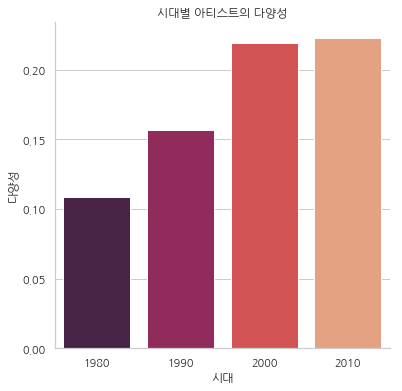

In [12]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")
sns.despine()
sns.barplot(x="ERA", y="ratio", data=era_static, palette="rocket")
ax.set_title("시대별 아티스트의 다양성")
plt.xlabel('시대')
plt.ylabel('다양성')

## 2. 아티스트 순위(곡 수 기준)

* 시대별 아티스트 순위

In [0]:
artist_rank_era = pd.DataFrame()

for era in ERA:
  artist_rank_era = pd.concat([artist_rank_era, music_data[music_data['시대']==era]['아티스트'].value_counts()[:10].reset_index()], axis=1)
  
artist_rank_era.columns = ['아티스트(1980)','곡 수','아티스트(1990)','곡 수','아티스트(2000)','곡 수','아티스트(2010)','곡 수']

In [14]:
artist_rank_era

,아티스트(1980),곡 수,아티스트(1990),곡 수,아티스트(2000),곡 수,아티스트(2010),곡 수
0,조용필,146,김건모,73,에픽하이 (EPIK HIGH),96,나훈아,92
1,김연자,115,서태지와 아이들,69,장윤정,81,소녀시대 (GIRLS` GENERATION),61
2,나훈아,106,듀스,67,BIGBANG,75,남진,44
3,이문세,66,DJ DOC,64,다이나믹 듀오(Dynamic Duo),72,도끼(DOK2),41
4,김현식,64,조용필,59,리쌍(LeeSSang),65,강진,37
5,이미자,62,업타운(UpTown),55,Various Artists,57,유지나,33
6,김수희,62,Various Artists,53,MC몽,54,자우림,31
7,이선희,53,쿨(COOL),52,나훈아,48,2PM,31
8,송창식,50,이문세,52,심수봉,48,티아라(T-ara),31
9,들국화,49,박강성,50,루시드 폴,46,포맨,31


* 전체 기준 아티스트 순위

In [15]:
artist_rank = music_data['아티스트'].value_counts()[:10].reset_index()
artist_rank.columns=['아티스트','곡 수']
artist_rank

,아티스트,곡 수
0,나훈아,282
1,조용필,219
2,이미자,150
3,심수봉,127
4,이문세,125
5,김연자,123
6,Various Artists,121
7,에픽하이 (EPIK HIGH),106
8,이승철,103
9,부활,102


* 순위권 아티스트의 시대별 곡 분포

In [0]:
artist_rank_data = pd.DataFrame()
for artist in artist_rank['아티스트']:
  artist_rank_data = pd.concat([artist_rank_data, music_data[music_data['아티스트']==artist]])

Text(0, 0.5, '곡 수')

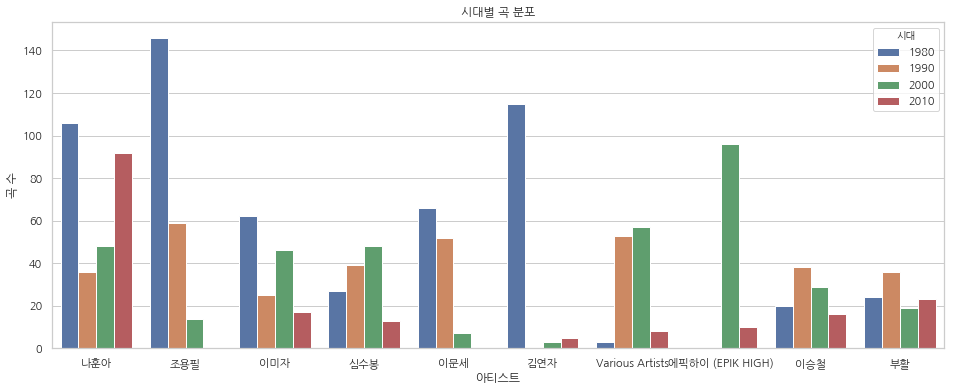

In [17]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x="아티스트",hue="시대",data=artist_rank_data)
ax.set_title("시대별 곡 분포")
plt.ylabel('곡 수')

## 3. 시대별 선호 장르

In [0]:
music_data['시대'] = music_data['시대'].astype('category') # stripplot y축을 카테고리로 제시하기 위하여 변환

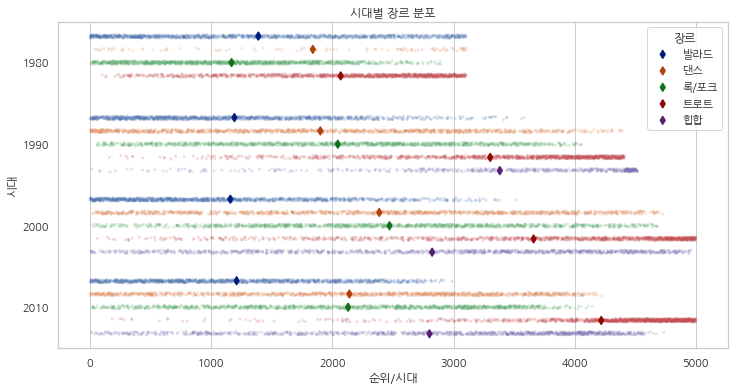

In [19]:
sns.set(style="whitegrid", font="nanumgothic")
f, ax = plt.subplots(figsize=(12, 6))

sns.stripplot(x="순위/시대", y="시대", hue="장르",
              data=music_data, dodge=True, jitter=True,
              size=3, alpha=.2, zorder=1)


sns.pointplot(x="순위/시대", y="시대", hue="장르",
              data=music_data, dodge=.65, join=False, palette="dark",
              markers="d", scale=.8, ci=None)


ax.set_title("시대별 장르 분포")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[5:], labels[5:], title="장르")

## 4. 곡 제목 분석

In [20]:
pip install konlpy

In [0]:
from konlpy.tag import Komoran, Twitter, Hannanum

In [22]:
Komoran = Komoran()
Twitter = Twitter()
Hannanum = Hannanum()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
music_string = music_data['곡명'].to_string(index=False)

In [0]:
# KoNLPy의 Tagger가 여러 버젼이 있음으로 비교
music_noun_ko = Komoran.nouns(music_string)
music_noun_tw = Twitter.nouns(music_string)
music_noun_han = Hannanum.nouns(music_string)

In [0]:
music_noun_ko = pd.Series(music_noun_ko)
music_noun_tw = pd.Series(music_noun_tw)
music_noun_han = pd.Series(music_noun_han)

In [26]:
music_noun_compare = pd.DataFrame()
music_noun_compare = pd.concat([music_noun_compare, music_noun_ko.value_counts()[:10].reset_index()], axis=1)
music_noun_compare = pd.concat([music_noun_compare, music_noun_tw.value_counts()[:10].reset_index()], axis=1)
music_noun_compare = pd.concat([music_noun_compare, music_noun_han.value_counts()[:10].reset_index()], axis=1)
music_noun_compare.columns = ['Komoran','count','Twitter','count','Hannanum','count']
music_noun_compare

,Komoran,count,Twitter,count,Hannanum,count
0,사랑,910,사랑,1344,사랑,1030
1,사람,211,그대,350,나,484
2,이별,173,너,349,너,362
3,말,152,나,326,그대,354
4,여자,141,내,280,내,233
5,눈물,140,사람,224,이별,168
6,날,130,이별,192,당신,167
7,밤,129,여자,180,여자,158
8,노래,129,그,179,사람,152
9,남자,127,당신,171,눈물,142


In [27]:
# Tagger들의 결론이 다양함으로 이를 합하여 좀 더 안정적인 결과물을 얻자
music_noun_mix = pd.concat([music_noun_ko,music_noun_tw,music_noun_han])
music_noun_mix_rank = music_noun_mix.value_counts()[:10].reset_index()
music_noun_mix_rank.columns = ['Tagger Mix','count']
music_noun_mix_rank['count'] = music_noun_mix_rank['count']//3
music_noun_mix_rank

,Tagger Mix,count
0,사랑,1094
1,나,271
2,너,237
3,그대,234
4,사람,195
5,내,193
6,이별,177
7,여자,159
8,말,149
9,눈물,149


In [0]:
music_noun_era= pd.DataFrame()
for era in ERA:
  music_string = music_data[music_data['시대']==era]['곡명'].to_string(index=False)
  music_noun_mix_era = pd.concat([pd.Series(Komoran.nouns(music_string)), pd.Series(Twitter.nouns(music_string)), pd.Series(Hannanum.nouns(music_string))]).reset_index(drop=True)
  music_noun_mix_era = pd.concat([music_noun_mix_era, pd.Series([era]*music_noun_mix_era.shape[0])], axis=1)
  music_noun_era = pd.concat([music_noun_era, music_noun_mix_era])
music_noun_era.columns=['단어','시대']

In [0]:
music_noun_rank_data = pd.DataFrame()
for noun in music_noun_mix_rank['Tagger Mix']:
  music_noun_rank_data = pd.concat([music_noun_rank_data, music_noun_era[music_noun_era['단어']==noun]])

Text(0, 0.5, '곡 수(X3)')

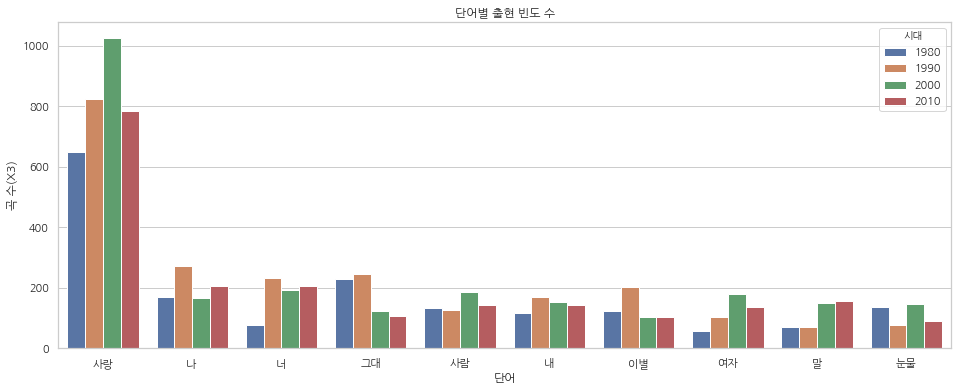

In [30]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x="단어",hue="시대",data=music_noun_rank_data)
ax.set_title("단어별 출현 빈도 수")
plt.ylabel('곡 수(X3)')